# Milestone 1

### Introduction: Statement of Problem

A restauranteur is planning to open a new restaurant specializing in vegan cuisine and would like to predict the success of new recipes created by the restaurant's chefs before they are served to the public. The restauranteur has hired a team of data scientists to develop a model to predict the success of new recipes based on ratings and reviews of existing recipes. The data scientists have obtained a data set from food.com (via kaggle.com) with recipes that have been rated and reviewed by the site's users. They now must determine the feasibility of developing a working model to predict the rating of a given recipe based on other attributes supplied in the data set. The initial goal is to develop a model that can predict a recipe's rating based attributes such as nutritional content, ingredients, visual characteristics, and a range of descriptive tags of recipes. A longer range goal is to perform sentiment analysis on the reviews. When the model is developed, the restaurant's chefs hope to be able to tweak the recipes they create to achieve higher ratings with the restaurant's guests and visiting food critics.

A number of assumptions are being made in this approach:
 - It is assumed that the population of users submitting recipes on the food.com web site is sufficiently similar to the population that the proposed new restaurants will serve that insights are transferrable between these populations.
 - It is assumed that easily measurable data gleaned from a recipe is sufficient to predict the sucess of a meal without considering factors that are more difficult to measure, such as the skill of the chefs, the quality of equipment, and nuances presentation.
 - It is assumed that user ratings of food prepared at home are comparable to user ratings of food served at a restaurant (more on this problem below where the skewness of user ratings suggests that this assumption may not be valid).

### Data Set Background

Original source of the data set is https://www.kaggle.com/shuyangli94/food-com-recipes-and-user-interactions/version/2.

I have extracted vegan recipes from the original data set and cleaned the data in various ways as part of my milestone project for DATASCI 400 CS as well as the present milestone project:
- Removed recipes that are not vegan based on a string-based list of tags in the kaggle.com data set
- Removed recipes that contain non-vegan ingredients that were mis-tagged as vegan in the kaggle.com data set (e.g. chicken, eggs, dairy products, etc.)
- Removed desserts, breads, and other recipes that are not main courses, sides, soups, salads, and appetizer
- Removed recipes that are incomplete for serving in a restaurant, such as spice rubs, marinades
- Removed recipes with incomplete nutritional data
- Removed recipes with an insufficient number of user reviews (less than three)
- Added missing variables that are listed on the web site but not in the data set, for example, serving size and number of servings. These variables are crucial to make use of the nutritional information for comparisons but are missing in the kaggle.com data set. I have re-added these fields to the data set by scraping food.com web side and parsing the HTML for the proper fields.
- Created dichotomous variables for categorical data parsed from string-based lists in the kaggle.com data set

The new data set is https://raw.githubusercontent.com/pelorenz/vegan_recipes/master/vegan_recipes_v2.data

### Preparation

Import required libraries:

In [4]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Set global options:

In [5]:
# Display plots inline
%matplotlib inline

# Display all outputs from cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Increase number of list elements rendered in output
pd.set_option('display.max_rows', 100)

Declare functions:

In [6]:
# Function declarations

# Display box plot for the given column
def show_box_plot(df, col_name, axis, label):
    axis.boxplot(df.loc[:, col_name])
    axis.set_title('Box plot of ' + label) # Give the plot a main title
    axis.set_ylabel(label) # Set  text for y axis

# Display kernel density plot for the given column with options
def show_kde_plot(df, col_name, axis, bandwidth, label):
    sns.kdeplot(df.loc[:, col_name], ax = axis, bw = bandwidth)
    axis.set_title('KDE plot of ' + label) # Give the plot a main title
    axis.set_xlabel(label) # Set text for the x axis
    axis.set_ylabel('Density')# Set text for y axis


Load the data set:

In [7]:
# Internet location of the data set
# TODO: use Internet url!
#url = 'https://raw.githubusercontent.com/pelorenz/vegan_recipes/master/vegan_recipes_v2.data'
url = 'vegan_recipes_v2.data'

# Download the data into a dataframe object
recipes = pd.read_table(url)

Inspect initial rows of data set:

In [37]:
recipes.head()

,name,id,n_ingredients,serving_size_g,n_servings,calories,calories_per_g,total_fat_pdv,total_fat_g,total_fat_pct,...,has_citrus,has_vinegar,has_alcohol,has_complex_sugar,is_red,is_orange,is_yellow,is_green_light,is_green_dark,is_purple
0,fool the meat eaters chili,54272,12,352,4,295.6000,0.8398,3,1.9500,0.0055,...,0,0,0,0,0,1,0,0,1,0
1,mock a mole low fat guacamole,81185,7,137,6,115.9000,0.8460,7,4.5500,0.0332,...,1,0,0,0,0,1,0,1,1,0
2,sour cream avocado dip vegan,112959,7,15,48,12.8000,0.8533,1,0.6500,0.0433,...,1,0,0,0,0,0,0,1,0,0
3,cream of mushroom soup,50184,9,544,4,473.2000,0.8699,59,38.3500,0.0705,...,0,0,0,0,0,0,0,0,0,0
4,slightly spicy black bean burgers,111462,11,223,4,337.3000,1.5126,8,5.2000,0.0233,...,0,0,0,0,0,0,1,0,0,0


Number of recipes and attributes in the data set:

In [38]:
print('Number of recipes in the data set is ' + str(len(recipes.index)))
print('Number of attributes in the data set is ' + str(len(recipes.columns)))

Number of recipes in the data set is 2968
Number of attributes in the data set is 90


Names and data types of the attributes:

In [10]:
recipes.dtypes

name                    object
id                       int64
n_ingredients            int64
serving_size_g           int64
n_servings               int64
calories               float64
calories_per_g         float64
total_fat_pdv            int64
total_fat_g            float64
total_fat_pct          float64
sugar_pdv                int64
sugar_g                float64
sugar_pct              float64
sodium_pdv               int64
sodium_g               float64
sodium_pct             float64
protein_pdv              int64
protein_g              float64
protein_pct            float64
saturated_fat_pdv        int64
saturated_fat_g        float64
saturated_fat_pct      float64
carbohydrates_pdv        int64
carbohydrates_g          int64
carbohydrates_pct      float64
ingredients             object
num_reviews              int64
mean_rating            float64
contributor_id           int64
course                  object
is_main_dish            object
is_side_dish            object
is_salad

#### Data Exploration Insight: Large Number of Variables

The data set contains a large number of variables. It is likely that only a subset of variables will be practical or prove useful in any model produced from this data set.

#### Data Exploration Insight: Large Number of Dichotomous Variables

The data set contains 60 yes/no variables. In producing a model, numeric methods will have to be chosen that are sensitive to binary values.

### Glossary of Attributes

Recipe identifiers:

- *contributor_id* - identifier of the user who contributed the recipe to food.com
- *id* - recipe identifier supplied by food.com
- *name* - contributor-supplied recipe name
- *order* - our own recipe identifier

Numeric attributes:

- *calories* - number of calories per serving
- *calories_per_g* - number of calories per gram
- *carbohydrates_pdv* - PDV of carbohydrates per serving
- *carbohydrates_g* - grams of carbohydrates per serving
- *carbohydrates_pct* - percent carbohydrates (g carbohydrates / g per serving)
- *mean_rating* - the mean user rating of the recipe
- *n_ingredients* - number of ingredients in the recipe
- *n_servings* - number of servings
- *num_review* - number of user reviews associated with the recipe
- *protein_pdv* - PDV of protein per serving
- *protein_g* - grams of protein per serving
- *protein_pct* - percent protein (g protein / g per serving)
- *saturated_fat_pdv* - PDV of saturated fat per serving
- *saturated_fat_g* - grams of saturated fat per serving
- *saturated_fat_pct* - percent saturated fat (g saturated fat / g per serving)
- *serving_size_g* - serving size in grams
- *sodium_pdv* - PDV of sodium per serving
- *sodium_g* - grams of sodium per serving
- *sodium_pct* - percent sodium (g sodium / g per serving)
- *sugar_pdv* - PDV of sugar per serving
- *sugar_g* - grams of sugar per serving
- *sugar_pct* - percent sugar (g sugar / g per serving)
- *total_fat_pdv* - PDV of total fat per serving
- *total_fat_g* - grams of total fat per serving
- *total_fat_pct* - percent total fat (g total fat / g per serving)

Dichotomous attributes denoting appropriate course during which the recipe might be served (somewhat subjective unfortunately), not mutually exclusive in the present data set:

- *is_appetizer* - true if the recipe is an appetizer
- *is_main_dish* - true if the recipe is a main dish
- *is_salad* - true if the recipe is a salad
- *is_sauce_or_garnish* - true if the recipe is a sauce or garnish
- *is_side_dish* - true if the recipe is a side dish
- *is_soup* - true if the recipe is a soup or stew

Dichotomous attributes denoting ingredients in the recipe, non-exhaustive focus on most common ingredients emphasizing flavor profile, texture, and similar subjective characteristics rather than scientific classification:

- *has_alcohol* - true if the recipe contains alcohol such as beer, wine, or hard alcohol
- *has_avocado* - true if the recipe contains avocado
- *has_berry* - true if the recipe contains berries, such as cranberries or strawberries, or pomegranate
- *has_bulb* - true if the recipe contains alliums or similar such as garlic, leeks, onion, or shallots
- *has_cabbage* - true if the recipe contains broccoli, cauliflower, or cabbage
- *has_citrus* - true if the recipe contains citrus such as lemon, lime, orange, or grapefruit
- *has_complex_sugar* - true if the recipe contains complex sugars such as molasses, maple syrup, or raw sugar
- *has_corn* - true if the recipe contains corn or cornmeal
- *has_cucumber* - true if the recipe contains cucumbers
- *has_curry* - true if the recipe contains curry
- *has_dairy_subs* - true if the recipe contains dairy substitutes for milk, cheese, sour cream, or yogurt
- *has_egg_subs* - true if the recipe contains egg substitutes or vegan mayo
- *has_eggplant* - true if the recipe contains eggplants
- *has_grain* - true if the recipe contains grains, such as barley, oats, spelt, wheat, or other grains excluding corn, rice, gluten, noodles, and pasta
- *has_green* - true if the recipe contains greens such as kale or spinach, excluding cabbage and lettuce
- *has_herb* - true if the recipe contains green herbs, celery, or vegetable stock
- *has_hot_pepper* - true if the recipe contains hot peppers
- *has_legume* - true if the recipe contains beans or legumes, such as lentils, chickpeas, mung beans, or peas, excluding legumes served in pods
- *has_lettuce* - true if the recipe contains lettuce or chicory
- *has_margarine* - true if the recipe contains margarine
- *has_meat_subs* - true if the recipe contains meat substitutes
- *has_misc_spice* - true if the recipe contains spices excluding herbs and warm spices
- *has_mushroom* - true if the recipe contains mushrooms
- *has_noodle* - true if the recipe contains noodles or pasta, including rice noodles and bean thread
- *has_nut* - true if the recipe contains nuts, almonds, peanuts, etc.
- *has_oil* - true if the recipe contains oil, such as olive or sesame oil
- *has_olive* - true if the recipe contains olives, capers, olive oil, pesto, etc.
- *has_paste* - true if the recipe contains paste of legumes or seeds, such as sesame paste
- *has_peppercorn* - true if the recipe contains peppercorns ground or unground
- *has_pod* - true if the recipe contains legumes still in their pods, such as okra, green beans, snap peas, etc.
- *has_pome_fruit* - true if the recipe contains pome fruits, such as apples or pears, or their flavors, such as cider
- *has_potato* - true if the recipe contains potatoes
- *has_pungent* - true if the recipe contains fennel, horseradish, or mustard
- *has_rice* - true if the recipe contains rice
- *has_seed* - true if the recipe contains any kind of seeds unground
- *has_sprout* - true if the recipe contains sprouts
- *has_squash* - true if the recipe contains squash
- *has_stone_fruit* - true if the recipe contains stone fruits such as peaches, plums, apricots, or cherries
- *has_sweet_fruit* - true if the recipe contains fruits with high sugar content, such as dates, figs, grapes, or raisins
- *has_sweet_pepper* - true if the recipe contains sweet or bell peppers
- *has_sweet_tuber* - true if the recipe contains sweet tubers, such as sweet potatoes, or vegetables with a similar flavor profile, such as yams
- *has_tofu* - true if the recipe contains tofu, miso, tempeh, etc.
- *has_tomato* - true if the recipe contains tomatoes
- *has_tropical_fruit* - true if the recipe contains tropical fruits such as mangoes or pineapple
- *has_tuber* - true if the recipe contains tubers such as carrots, beets, or taro, excluding potatoes
- *has_vinegar* - true if the recipe contains vinegar including wine and fruit vinegar
- *has_warm_spice* - true if the recipe contains spices with a warm profile such as cinnamon, cloves, ginger, nutmeg, etc.
- *has_yeast* - true if the recipe contains yeast

Dichotomous attributes denoting recipe color, focus on primary colors:

- *is_dark_green* - true if the recipe contains at least one main ingredient whose color is dark green
- *is_light_green* - true if the recipe contains at least one main ingredient whose color is light green
- *is_orange* - true if the recipe contains at least one main ingredient whose color is orange
- *is_purple* - true if the recipe contains at least one main ingredient whose color is purple
- *is_red* - true if the recipe contains at least one main ingredient whose color is red
- *is_yellow* - true if the recipe contains at least one main ingredient whose color is yellow

Other attributes:

- *course* - categorical attribute indicating the recommended course during which the recipe might be served
- *ingredients* - text field listing recipe ingredients

#### Data Exploration Insight: Proxy Attributes

It is evident that a number of attributes are proxies that contain different measurements of the same underlying variable, for example, nutritional attributes measured in *percent daily value*, *grams per serving*, and *percent of mass per serving*. This presents no real problem since we will select one unit of measurement for our models, though we must select the same units for all attributes.

### Summary Statistics

Overview summary statistics for numeric attributes:

In [11]:
pd.options.display.float_format = '{:.4f}'.format
recipes[['n_ingredients', 'serving_size_g', 'n_servings', 'calories', 'calories_per_g', 
         'total_fat_pdv', 'total_fat_g', 'total_fat_pct', 'sugar_pdv', 'sugar_g', 
         'sugar_pct', 'sodium_pdv', 'sodium_g', 'sodium_pct', 'protein_pdv', 'protein_g', 
         'protein_pct', 'saturated_fat_pdv', 'saturated_fat_g', 'saturated_fat_pct', 
         'carbohydrates_pdv', 'carbohydrates_g', 'carbohydrates_pct', 'num_reviews', 
         'mean_rating']].describe().T

,count,mean,std,min,25%,50%,75%,max
n_ingredients,2968.0000,9.2426,3.7581,2.0000,7.0000,9.0000,12.0000,25.0000
serving_size_g,2968.0000,347.8851,806.7239,2.0000,124.0000,202.0000,326.2500,19215.0000
n_servings,2968.0000,5.0313,5.7899,1.0000,4.0000,4.0000,6.0000,192.0000
calories,2968.0000,263.9339,290.5454,0.1000,111.8000,195.6000,315.1000,4055.1000
calories_per_g,2968.0000,1.3029,1.3942,0.0009,0.5716,0.9560,1.5477,26.1984
total_fat_pdv,2968.0000,16.9869,35.0557,0.0000,3.0000,9.0000,20.0000,704.0000
total_fat_g,2968.0000,11.0415,22.7862,0.0000,1.9500,5.8500,13.0000,457.6000
total_fat_pct,2968.0000,0.0633,0.1336,0.0000,0.0078,0.0285,0.0679,2.8238
sugar_pdv,2968.0000,35.9693,101.5755,0.0000,7.0000,16.0000,33.0000,3162.0000
sugar_g,2968.0000,17.9847,50.7877,0.0000,3.5000,8.0000,16.5000,1581.0000


#### Data Exploration Insight: Inconsistent Sample Sizes

The serving sizes in grams per recipe (*serving_size_g*) are highly variable between recipes (standard deviation = 807 g). The ostensible reason for this is that the recipes derive from different sources with varying notions of an appropriate serving size. At the same time, smaller serving sizes may be expected and appropriate for recipes with certain rich ingredients or extreme flavors. In other cases, it is possible that the serving size has been adjusted down to create the impression that the recipe contains less of certain objectionable ingredients, such as sugar or saturated fats. Recipes with extremely large serving sizes (such as the max of 19215 g = 19 kilos!) are either erroneous or not broken down into serving sizes. If constituent nutrients such as total fat, carbohydrates, and protein are proportionate, it is likely that values have been supplied for the entire recipe and the sample may still be usable. Otherwise, the data is erroneous and should be removed from the data set.

#### Data Exploration Insight: Impossible Values

Some attributes indicating percent of mass have max values greater than 1.0, specifically *total_fat_pct*, *sugar_pct*, and *carbohydrates_pct*. They point to errors in the data. Unless the specific error can be identified and corrected, such recipes should be removed from the data set.

#### Data Exploration Insight: Skewness of Ratings

Although some recipes are extremely unpopular (min mean rating = 0.75), the fact that the 25th percentile falls at 4.2 on a scale of 0 to 5 reveals that most ratings submitted on the food.com web site are highly favorable. The most likely explanation is that food.com is a web-based community where users sense a certain communal bond with other users on the site, leading to more generous ratings of their fellow users attempts to create and share good recipes. One solution to accommodate this may be to rescale the *mean_rating* attribute to a logarithmic scale or redistribute ratings by binning according to their placement by percentile.

More seriously, however, the high favorability of these ratings may be a warning sign of a flawed methodology. It is possible that user reviews of recipes prepared at home are not sufficiently discriminating for use in anticipating the success of a recipe when served at a restaurant, where the context and expectations are very different than for recipes prepared at home. The reason is that users have higher expectations for food served at a restaurant than for food served at home. If so, the skewness of user ratings reflects a methodological problem. If the proposed data set will not help the restauranteur make effective decisions, it may be time for the hard choice to discard the data set and adopt another approach. At the same time, if available data sets are scarce, it still might be possible to glean which combinations of flavors and nutritional characteristics the population at large tends to prefer.

### Frequency of Categorical Attributes

Frequency of True (== 1) values for dichotomous attributes that describe recipe ingredients or color:

In [12]:
# List dichotomous variables by the number of times their value is True (1)
recipes[['has_egg_subs', 'has_dairy_subs', 'has_margarine', 'has_meat_subs', 'has_yeast', 
         'has_mushroom', 'has_grain', 'has_corn', 'has_rice', 'has_noodle', 'has_pungent', 
         'has_nut', 'has_seed', 'has_avocado', 'has_oil', 'has_olive', 'has_paste', 
         'has_peppercorn', 'has_curry', 'has_misc_spice', 'has_warm_spice', 'has_legume', 
         'has_pod', 'has_tofu', 'has_tuber', 'has_sweet_tuber', 'has_potato', 'has_bulb', 
         'has_sprout', 'has_herb', 'has_green', 'has_cabbage', 'has_lettuce', 'has_tomato', 
         'has_eggplant', 'has_sweet_pepper', 'has_hot_pepper', 'has_squash', 'has_cucumber', 
         'has_pome_fruit', 'has_stone_fruit', 'has_tropical_fruit', 'has_berry', 'has_sweet_fruit', 
         'has_citrus', 'has_vinegar', 'has_alcohol', 'has_complex_sugar', 'is_red', 'is_orange', 
         'is_yellow', 'is_green_light', 'is_green_dark', 'is_purple']].apply(
    lambda x: x.value_counts()).T[[1]].sort_values(by = 1, ascending=False)

,1
has_bulb,2330
has_oil,2079
has_herb,1645
has_olive,1356
has_peppercorn,1330
is_green_dark,1249
is_orange,1185
has_hot_pepper,1175
has_tomato,915
has_citrus,910


Frequency of True (== 1) values for dichotomous attributes that describe the course or courses during which a recipe might be served:

In [13]:
# List dichotomous variables by the number of times their value is True (1)
recipes[['is_main_dish', 'is_side_dish', 'is_salad', 'is_soup', 'is_appetizer', 
         'is_sauce_or_garnish']].apply(
    lambda x: x.value_counts()).T[['y']].sort_values(by = 'y', ascending=False)

,y
is_side_dish,1100
is_main_dish,851
is_salad,566
is_appetizer,521
is_soup,320
is_sauce_or_garnish,242


#### Data Exploration Insight: Subjectivity in Assignment of Categorical Variables

The determination as to which course a given recipe belongs is a highly subjective matter. What one user considers a side dish another user might consider a meal. This subjectivity means that categorical variables indicating the course to which a recipe has been assigned are nearly useless for modeling.

#### Data Exploration Insight: Categorical Variables with Poor Representation

Categorical variables that are poorly represented in the data set are unlikely to have an appreciable effect on the predictive ability of the model. For example, just 34 recipes use egg substitutes, while 915 recipes have tomatoes. It may be advisable to prune the large set of categorical variables by eliminating variables with poor representation in the data set.

### Distribution of Numeric Attributes

Explore the distributions of the numeric variables via kernel density plots:

Text(0.5, 0.98, 'Distribution of Key Nutrients by Value and Percent Mass')

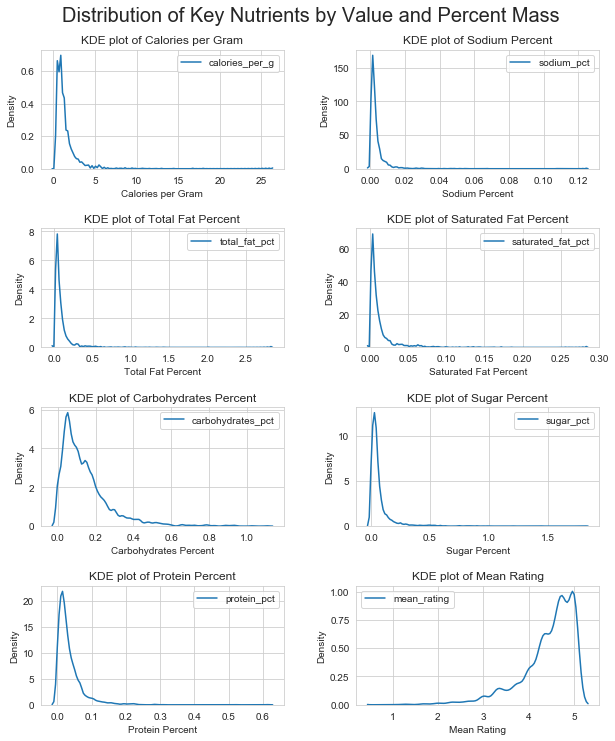

In [34]:
# Explore distributions of numeric columns via kernel density plots
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), 
      (ax7, ax8)) = plt.subplots(nrows=4, ncols=2, figsize=(10, 10))
plt.subplots_adjust(wspace=0.3, hspace=0.5, top=0.92, bottom=0.01)
fig.suptitle('Distribution of Key Nutrients by Value and Percent Mass', fontsize='20')
sns.set_style("whitegrid")
show_kde_plot(recipes, 'calories_per_g', ax1, 0.05, 'Calories per Gram')
show_kde_plot(recipes, 'sodium_pct', ax2, 0.0005, 'Sodium Percent')
show_kde_plot(recipes, 'total_fat_pct', ax3, 0.01, 'Total Fat Percent')
show_kde_plot(recipes, 'saturated_fat_pct', ax4, 0.001, 'Saturated Fat Percent')
show_kde_plot(recipes, 'carbohydrates_pct', ax5, 0.01, 'Carbohydrates Percent')
show_kde_plot(recipes, 'sugar_pct', ax6, 0.01, 'Sugar Percent')
show_kde_plot(recipes, 'protein_pct', ax7, 0.005, 'Protein Percent')
show_kde_plot(recipes, 'mean_rating', ax8, 0.1, 'Mean Rating')

The distributions of the seven nutritional attributes are positively skewed. The distribution of the mean rating is negatively skewed.

Text(0.5, 0.98, 'Distribution of Key Nutrients by Value and Percent Mass')

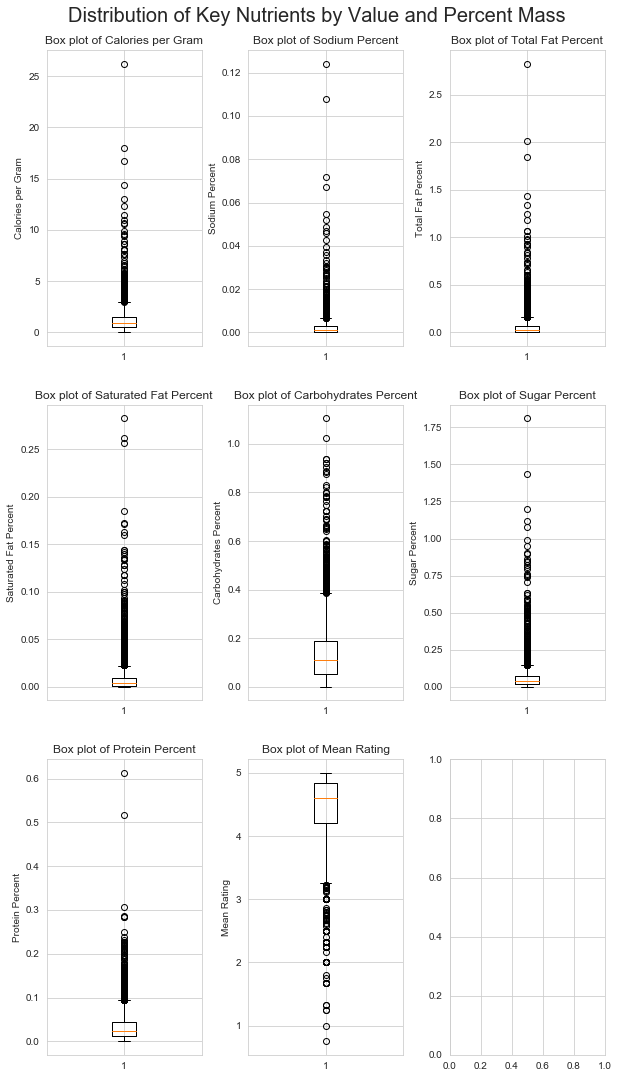

In [35]:
# Explore distributions of numeric columns via box plots
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), 
      (ax7, ax8, ax9)) = plt.subplots(nrows=3, ncols=3, figsize=(10, 15))
plt.subplots_adjust(wspace=0.3, hspace=0.2, top=0.94, bottom=0.01)
fig.suptitle('Distribution of Key Nutrients by Value and Percent Mass', fontsize='20')
sns.set_style('whitegrid')
show_box_plot(recipes, 'calories_per_g', ax1, 'Calories per Gram')
show_box_plot(recipes, 'sodium_pct', ax2, 'Sodium Percent')
show_box_plot(recipes, 'total_fat_pct', ax3, 'Total Fat Percent')
show_box_plot(recipes, 'saturated_fat_pct', ax4, 'Saturated Fat Percent')
show_box_plot(recipes, 'carbohydrates_pct', ax5, 'Carbohydrates Percent')
show_box_plot(recipes, 'sugar_pct', ax6, 'Sugar Percent')
show_box_plot(recipes, 'protein_pct', ax7, 'Protein Percent')
show_box_plot(recipes, 'mean_rating', ax8, 'Mean Rating')


#### Data Exploration Insight: Skewness of Numeric Variables

The skewness of the key numeric variables suggests that logarithmic rescaling may be helpful after dealing with outliers. It is evident that mean ratings tend to lie close to the maximum value of 5 out of 5, so most reviews on the site are positive. Again, a logarithmic scale could be helpful.

#### Data Exploration Insight: Outliers Suggesting that the Parts Are Greater Than the Whole

Outliers indicating bad data were noted above under summary statistics and are confirmed by the box plots. The box plots for total fat, carbohydrates, and sugar show a number of outliers with impossible values, where grams of the nutrient in a serving are recorded as exceeding the total mass of the serving. The solution is further clean up of the data set to remove outliers.

Since fats, carbohydrates, and proteins are mutually exclusive as components of food, it is also necessary to verify that the total percent mass of these components sums to 100 percent or less for each recipe. According to the following query, there are number of outliers where the mass of fats, carbohydrates, and proteins per serving sums to greater than the mass of a serving:

In [52]:
recipes[(recipes['total_fat_pct'] + recipes['carbohydrates_pct'] + recipes['protein_pct'] > 1.0)]['name']

34                                          african beans
63                                   amara veggie burgers
89                             apple spice salad dressing
211                           balsamic coconut milk sauce
229                                 basic homemade tahini
304                            black eyed peas with herbs
316                                    bob s mexican rice
317                          bobbie s poppy seed dressing
599                              coriander lemon couscous
661                                crispy beer flat bread
1174    heart healthy brain boosting cholesterol free ...
1218                         hot fried non nudist peanuts
1264                              indian style rice salad
1332               kadju badun sri lankan deviled cashews
1400                        lemon garlic oregano dressing
1524           mbaazi wa nazi pigeon peas in coconut milk
1595                                          mock tahini
1615          

There are 30 recipes in which the mass of fats, carbohydrates, and proteins per serving sums to greater than the mass of a serving:

In [53]:
len(recipes[(recipes['total_fat_pct'] + recipes['carbohydrates_pct'] + recipes['protein_pct'] > 1.0)])

30

Unless we can identify the error that has occurred and correct it, these recipes should be removed from the data set.

### Relationships between Variables

Use a pair plot to look for relationships between the variables:

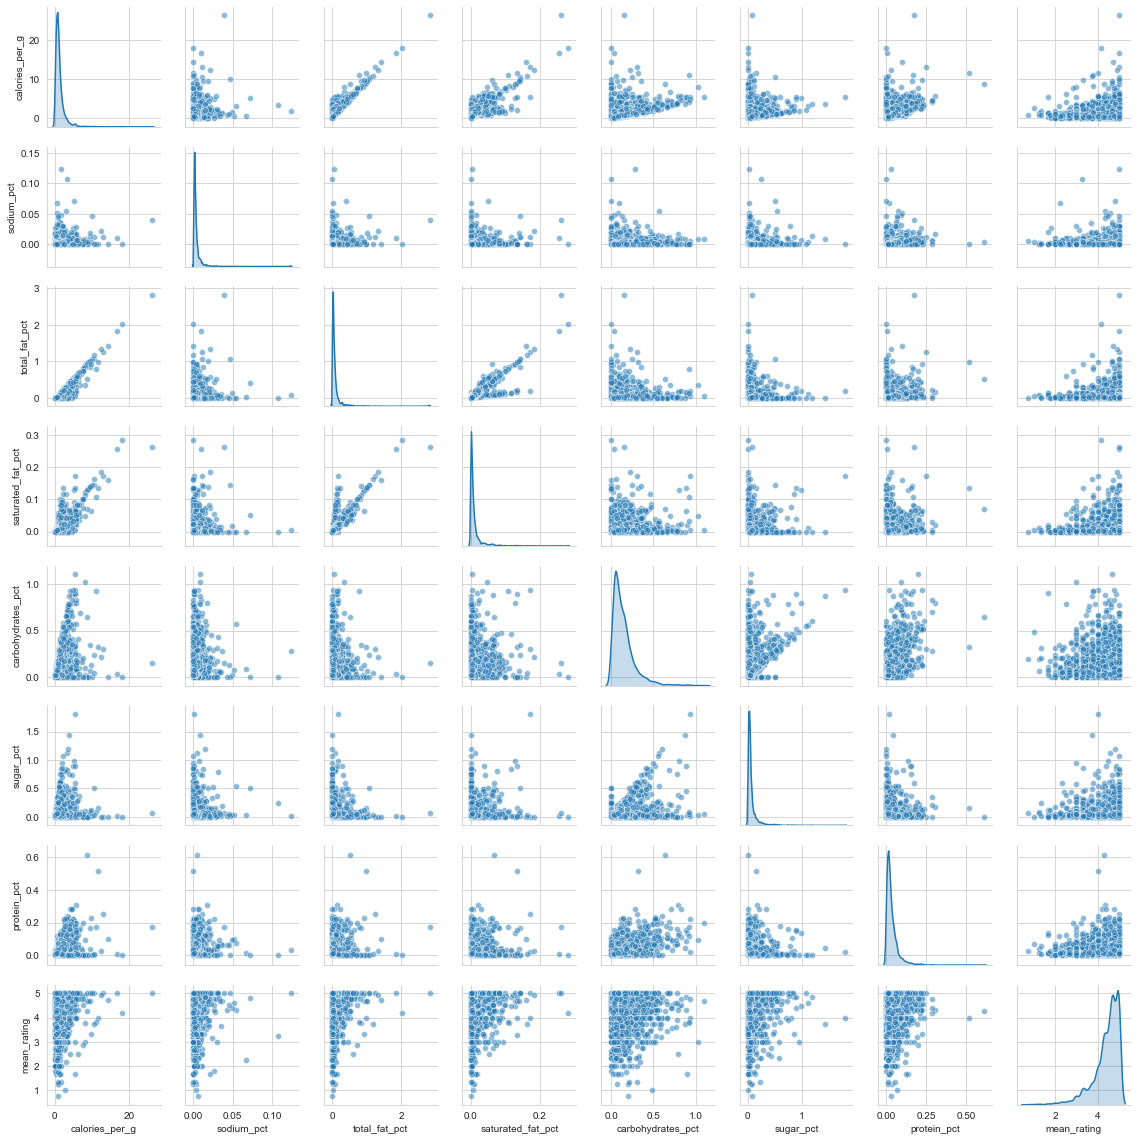

In [16]:
sns.pairplot(recipes.loc[:, ['calories_per_g', 'sodium_pct', 'total_fat_pct', 'saturated_fat_pct', 
                             'carbohydrates_pct', 'sugar_pct', 'protein_pct', 'mean_rating']],
             palette="seismic", diag_kind="kde", 
             height=2, plot_kws={'alpha': 0.5})

The pair plots are difficult to interpret because the axes have different calibrations. Thus, *total_fat_pct* has a range of 0 It would be helpful to z-normalize the variables to allow accurate comparison.

#### Data Exploration Insight: Correlations between Attributes

A number of correlations indicative or potentially indicative of meaningful relationships deserve notice:

 - *total_fat_pct* and *saturated_fat_pct* - this correlation is not surprising because saturated fat is a sub-category of total fat. Nevertheless, the presence of two intersecting regression lines is remarkable and merits further investigation.

 - *calories* and *total_fat_pct* - this correlation reflects a well-known relationship since fat contributes to total calorie count. There is also a similar though noisier correlation between *calories* and *saturated_fat_pct* for the same reason.

 - *carbohydrates_pct* and *sugar* - this correlation reflects the fact that sugar is a carbohydrate. Still, the correlation is far from perfect suggesting that the relationship merits a closer look.

#### Correlation Matrix

Although we should beware correlations as potentially suggesting spurious relationships, they can nevertheless point us to attributes whose relationship warrants further investigation. Correlation matrix of numeric variables:

In [17]:
recipes[['calories_per_g', 'sodium_pct', 'total_fat_pct', 'saturated_fat_pct', 
         'carbohydrates_pct', 'sugar_pct', 'protein_pct', 'mean_rating']].corr()

,calories_per_g,sodium_pct,total_fat_pct,saturated_fat_pct,carbohydrates_pct,sugar_pct,protein_pct,mean_rating
calories_per_g,1.0000,0.2340,0.8933,0.8072,0.4542,0.1661,0.4970,0.0236
sodium_pct,0.2340,1.0000,0.1886,0.1571,0.0646,0.0996,0.1703,-0.0404
total_fat_pct,0.8933,0.1886,1.0000,0.8741,0.0250,0.0272,0.2308,0.0587
saturated_fat_pct,0.8072,0.1571,0.8741,1.0000,0.0985,0.1381,0.2157,0.0331
carbohydrates_pct,0.4542,0.0646,0.0250,0.0985,1.0000,0.3590,0.5467,-0.0480
sugar_pct,0.1661,0.0996,0.0272,0.1381,0.3590,1.0000,-0.0084,0.0031
protein_pct,0.4970,0.1703,0.2308,0.2157,0.5467,-0.0084,1.0000,-0.0529
mean_rating,0.0236,-0.0404,0.0587,0.0331,-0.0480,0.0031,-0.0529,1.0000


#### Data Exploration Insight: Expected Correlations

The correlation matrix shows correlations between nutrients known to be related, namely total fat and calories (0.89). By definition there is a relationship between saturated fat and total since the former is a subset of the latter.

## Conclusions

Data exploration of our vegan_recipes_v2 data set derived from user-submitted recipes on food.com suggests a number of potentially useful correlations between attributes.
 - Correlations between calories and total fat, total fat and saturated fat, and carbohydrates and sugar are expected based on known relationships.
 - The relationship between total fat and saturated fat exhibits some complexity that may illuminate the relationship between these variables.

Data exploration has revealed areas where the data set requires further cleaning or requires adaptation to become suitable for building a model.
 - The data set contains a large number of variables, especially dichotomous variables, some of which could be eliminated in building a model since they involve just a small number of recipes.
 - A number of variables are proxies for other variables. Hence, only one these variables should be used in the model.
 - Because the recipes derive from many sources, the serving sizes are not consistent. Nevertheless, as long as the quantities of nutrients are proportionate, this should not pose a problem.
 - More problematic are recipes with impossible values for certain nutrients in which the mass of a given nutrient exceeds the mass of a serving or the mass of mutually-exclusive nutrients (fats, carbohydrates, and proteins) exceeds the mass of a serving. Unless the cause of the error can be discerned and corrected, these recipes should be removed from the data set.
 - The numeric variables are generally positively skewed suggesting that a logarithmic scale or redistribution by percentiles may be helpful.
 - Finally, the categorical variables indicating the course during which a recipe is served were found to be so subjective as to be practically useless.

In addition, data exploration has exposed certain limitations of the data set that suggest that it may not prove as useful for its intended purpose as originally envisioned. In particular, the skewness of the *mean_rating* attribute towards highly-favorable ratings suggests that user-submitted ratings on a popular recipe web site may not be comparable to the expectations of guests at a restaurant. Hence, it is possible that the data science project as initially envisioned has been misconceived. If methodological adjustments cannot be made, the data set should be discarded in favor a data set with more balanced, more critical ratings. At the same time, if no other data sets are readily available, it may be necessary to use the present data set with controls for the observed bias in ratings.